In [1]:
using Pkg; Pkg.activate(".")
using IJulia
using Plots
using Roots
using Polynomials
using SymPy
using PyCall

  Activating new project at `c:\Users\awbre\Documents\ComputationalDynamics\HW4`


**Problem 4.2 a**

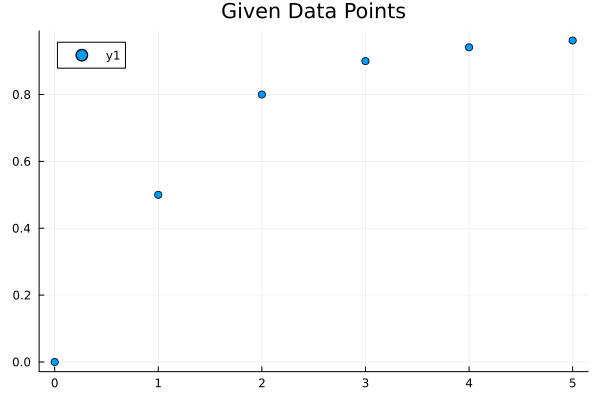

In [4]:
x = [0:5;]
y = [0 .5 .8 .9 .941176 .961538]'

givenPointsPlot = scatter(x,y, title = "Given Data Points")
display(givenPointsPlot)


For quadratic, looking for x* where y(x*) = .93. For this, I will interpolate over the last three points to get a quadratic curve fit.

In [3]:
function quadInterp(X, Y)
    A  = zeros(Float64, 3,3)
    for i in 1:3
        for j in 1:3
            A[j,i] = X[j]^(i-1)
        end
    end
    aVals = A\Y
    return aVals
end


quadInterp (generic function with 1 method)

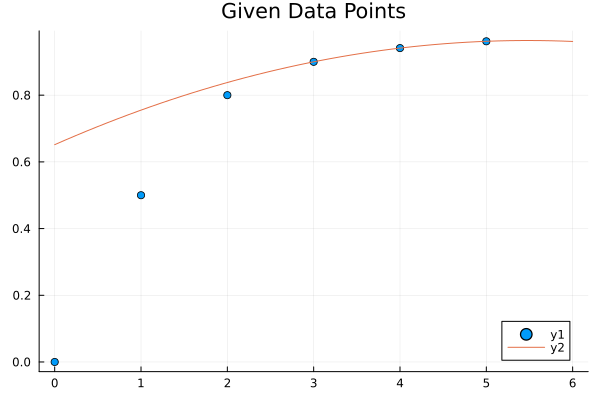

In [4]:
a = quadInterp(x[4:6], y[4:6])
X = LinRange(0,6,50)
Y = a[1] .+ X.*a[2] + (X.^2).*a[3]
quadPlt = plot!(X,Y)
display(quadPlt)

We have the quadratic in the form y = a(1) + a(2)x + a(3) x^2
To solve for x, set the eqation to zero and solve for the roots
Now, this equation can be solved for x, and the by plugging in y = .93 the result is 

In [5]:
ystar = .93
a[1] -= ystar
X = LinRange(0,6,50)
Y = a[1] .+ X.*a[2] + (X.^2).*a[3]
polya = Polynomial(a)
r = roots(polya)
display(r)


2-element Vector{Float64}:
 3.672954042133372
 7.2836136526874204

Since this is a quadratic fit, there are two roots. However 3.672 is the correct value for this problem due to it being in the range of given data points. 

**Problem 4.2 b**

For this section of the problem, four points must be chosen. I will choose the last four points here as they are spaced around y = 0.93

In [2]:
function lag(x,j,X)
    n = length(X)

    # l = 1.
    l = one(typeof(x))

    for m = 1:n
        if m != j
            l *= ( x - X[m])/( X[j] - X[m] )
        end
    end
    return l

end

function interp(X,Y)

    n = length(X)
    @assert n == length(Y)

    return function (x)

        return sum( lag(x, j, X)*Y[j] for j in 1:n  )

    end
end

interp (generic function with 1 method)

In [16]:
function findXVal(f, xRange, target, tol = 1e-6)
    leftSide = xRange[1]

    rightSide = xRange[2]
    halfWay = (xRange[2] - xRange[1])/2
    count = 0
    while true
        halfWayVal = f(halfWay)
        rightSideVal = f(rightSide)
        leftSideVal = f(leftSide)
        if  abs(halfWayVal - target) <= tol
            return halfWay
        elseif (leftSideVal > target > halfWayVal) || (leftSideVal < target < halfWayVal)
            rightSide = copy(halfWay)
            halfWay = (halfWay - leftSide) / 2
        else
            leftSide = copy(halfWay)
            halfWay = (rightSide - halfWay) / 2
        end
        count += 1
        print("Current halfway val is: ", halfWayVal, "\n")
        if count >= 30
            throw(error("Failed to converge"))
        end
    end
end
        




findXVal (generic function with 3 methods)

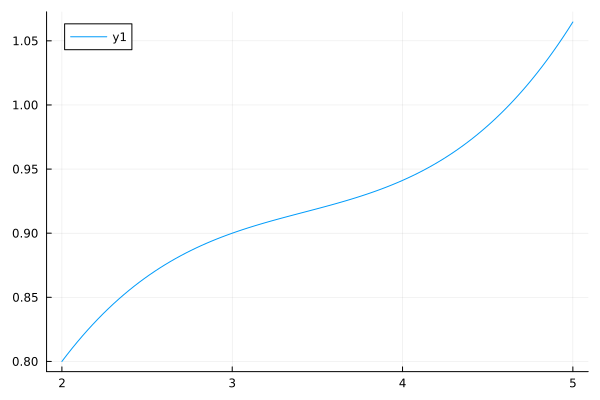

In [19]:
xForThis = x[2:5]
yForThis = y[2:5]
L = interp(xForThis, yForThis)
xs = LinRange(2,5,100)
ys = L.(xs)
plot(xs,ys)

In [17]:
xForThis = x[2:5]
yForThis = y[2:5]
L = interp(xForThis, yForThis)



findXVal(L, [x[2], x[5]], .93)


Current halfway val is: 0.6838235
Current halfway val is: 0.6014705625
Current halfway val is: 0.6448988671875
Current halfway val is: 0.6237649072265625
Current halfway val is: 0.6344747811279297
Current halfway val is: 0.6291558369293213
Current halfway val is: 0.631824273557663
Current halfway val is: 0.6304923005831241
Current halfway val is: 0.63115884787938
Current halfway val is: 0.630825714499239
Current halfway val is: 0.6309923162480886
Current halfway val is: 0.6309090241393858
Current halfway val is: 0.6309506723850393
Current halfway val is: 0.6309298488100541
Current halfway val is: 0.6309402607345052
Current halfway val is: 0.6309350548065195
Current halfway val is: 0.6309376577790722
Current halfway val is: 0.6309363562949357
Current halfway val is: 0.630937007037539
Current halfway val is: 0.6309366816663711
Current halfway val is: 0.6309368443519885
Current halfway val is: 0.6309367630091883
Current halfway val is: 0.6309368036805902
Current halfway val is: 0.63093678

ErrorException: Failed to converge

**Problem 4.3**